<!-- JPN -->
# アンサンブル学習


<!-- ENG -->
# Ensemble learning


<!-- JPN -->
※本演習資料の二次配布・再配布はお断り致します。

<!-- ENG -->
※Distribution or redistribution of these exercise materials without the copyright holder's permission is not permitted.

<!-- JPN -->
　今回の演習の内容は以下の3つである。

1. **データセットの構築**
2. **アンサンブル学習 (ensemble learning)**
3. **予測された確率値による予測結果の解析**

<!-- ENG -->
　The practice exercises this time are the following three.

1. **Building a data set**
2. **Ensemble learning**
3. **Analysis of prediction results using predicted probability values**

<!-- JPN -->
## 1 | データセットの構築

<!-- ENG -->
## 1 | Building a data set

<!-- JPN -->
今回は手書き文字認識 (digits) のデータセットを用いる。

<!-- ENG -->
　We will be using a data set of handwritten recognition (digits data set) this time.

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt

d = datasets.load_digits()
images = d.images

<!-- JPN -->
　以下のセルは、digitsのデータセットの画像を表示してくれる。 `image_index` が画像の番号を表すので、いくつかの画像を目で見ておくと良い。

<!-- ENG -->
　The following cell shows you the digits data set image. Since `image_index` represents the number of the image, it would be good to take a look at some of the images.

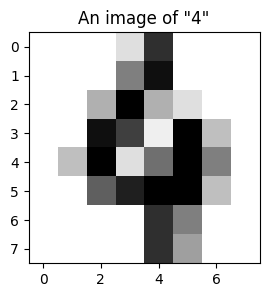

In [2]:
# display digit image
# change image_index and see each image with its label

image_index = 100
plt.figure(1, figsize=(3, 3))
plt.imshow(images[image_index], cmap=plt.cm.gray_r, interpolation='nearest')
plt.title(f"An image of \"{d.target[image_index]}\"")
plt.show()

<!-- JPN -->
　今回も汎化性能を見るために訓練データとテストデータに分割し、訓練データのみから学習を行い、テストデータを予測することでモデルを評価していく。

<!-- ENG -->
　This time as well, in order to see the generalization performance, we will split it into training data and test data, learn from only the training data, and evaluate the model by predicting the test data.

In [3]:
# make training/test data set
n_train = 1000
X_train = d.data[:n_train,:]
y_train = d.target[:n_train] # training data
X_test = d.data[n_train:,:]
y_test = d.target[n_train:] # test data

images_train = images[:n_train]
images_test = images[n_train:]

<!-- JPN -->
## 2 | アンサンブル学習

　**アンサンブル学習**とは、一つ一つの予測性能は高くない学習器を複数学習し、それらを多数決や平均などで集約した結果を出力することで、個々の学習器よりも高い精度の予測を行う手法である。原理的にはどのような機械学習手法を用いてもアンサンブル学習を行うことができるが、今回はアンサンブル学習で一般的に用いられる決定木を使用する。

<!-- ENG -->
## 2 | Ensemble learning

　**Ensemble learning** is a method of predicting higher accuracy results using multiple learners, which do not have high prediction performance if trained individual, and outputting the results aggregated by average and majority voting, etc. In principle, any machine learning model can be used with ensemble learning, but in this case we will use decision trees, which is commonly used for ensemble learning.

<img src="https://i.imgur.com/QW3bY7I.png" width=70% />

<!-- JPN -->
　具体的なアンサンブル学習の手法を学ぶ前に決定木について復習しよう。
決定木（decision tree）とは、目的変数（従属変数）をうまく分類できる説明変数で分岐させ続けることで分類を行うモデルである。



<!-- ENG -->
　Before learning about specific ensemble learning methods, let's review the decision trees.
The decision tree is a model that classifies the class label (dependent variable) by continuously branching it with explanatory variables which works well for classifying.



In [17]:
from sklearn import tree, metrics
single_tree = tree.DecisionTreeClassifier(max_depth=10, random_state=0)

single_tree.fit(X_train,y_train) # fitting
y_pred = single_tree.predict(X_test) # prediction for test data set

print(metrics.accuracy_score(y_pred, y_test)) # test accuracy

0.7791718946047679


<!-- JPN -->
　決定木単体では、テストデータに対して0.779という正解率であった。アンサンブル学習によって、この正解率がどのように変化していくのか見ていこう。

<!-- ENG -->
　The decision tree by itself had an accuracy of 0.779 for the test data. Let's take a look at how the accuracy will change using ensemble learning.

<!-- JPN -->
### 2.1 | バギング (bagging)

<!-- ENG -->
### 2.1 | Bagging

<!-- JPN -->
　**バギング**とは複数の決定木の平均、もしくは多数決で予測を行う手法である。しかし、一般的には同じデータセットから学習を行うと同じ決定木が得られてしまう。当たり前であるが、同じモデルの平均や多数決では予測精度は向上しないので、異なるモデルを得る必要がある。

　一方、一つのデータセットを加工して複数の異なるデータセットを得ることができれば、そこから異なる決定木を学習することができる。この手法の一つに**ブートストラップ法 (bootstrap resampling)** がある。**バギングではブートストラップ法を用いて複数のデータセットを作成し、それぞれのデータセットに対して決定木を訓練する**ことで異なる決定木を得る。

<!-- ENG -->
　**Bagging** is a method of making predictions by averaging multiple decision trees or by using majority voting. In general, training from the same data set will result in the same decision tree. Obviously, averaging or majority voting of the same model will not improve the prediction accuracy, so we need to obtain different models.

　If we can process one data set to obtain several different data sets, we can train different decision trees from them. One of these methods is **bootstrap resampling**. **In bagging, multiple data sets are created using the bootstrap resampling, and decision trees are trained on each data set** to obtain different decision trees.

<!-- JPN -->
　ブートストラップ法では、$N$ 個のデータを含むデータセットから **重複を許して（復元抽出で）** ランダムに $N$ 個を取り出し、新しいデータセットを作る。簡単なデータに対して実際にブートストラップ法を適用してみよう。

<!-- ENG -->
　With the bootstrap resampling, a new data set is created by randomly extracting $N$ items from a data set containing $N$ items of data by random sampling with replacement. Let's try applying the bootstrap resampling to some simple data.

In [5]:
import numpy as np

data_orig = np.arange(10) # make a list of [0...9]
print(data_orig)

[0 1 2 3 4 5 6 7 8 9]


In [6]:
data_sampled = np.random.choice(data_orig, len(data_orig)) # randomly choose from data_orig. do (len(data_orig)) times
print(data_sampled)

data_sampled = np.random.choice(data_orig, len(data_orig))
print(data_sampled)

[8 0 9 9 9 7 3 3 8 7]
[6 1 4 6 9 2 7 9 6 9]


<!-- JPN -->
　このように、ブートストラップ法を用いることにより、一つのデータセットから複数のデータセットを作成することができる。（これを使って、自分でバギングを実装するのは課題とする。）

<!-- ENG -->
　Thus, by using the bootstrap resampling, multiple data sets can be generated from a single data set. (It will be your assignment to implement bagging by yourself by using the bootstrap.)

<!-- JPN -->
　次に、scikit-learnを使ってバギングを実際に行ってみよう。scikit-learnでは`sklearn.ensemble`にアンサンブル学習の手法がまとめられている。scikit-learnのバギング (`BaggingClassifier`) では、`estimator`に指定したモデルを自動的に`n_estimators`個作成し、その多数決または平均で予測を行うことができる。

　`BaggingClassifier.fit()`を行うと、内部でブートストラップ法を用いて複数のデータセットが作成され、`n_estimators`個のモデルが独立に訓練されている。

<!-- ENG -->
　Next, let's try bagging using scikit-learn. In scikit-learn, ensemble learning methods are included in `sklearn.ensemble`. With scikit-learn's bagging (`BaggingClassifier`), the model specified in `estimator` can be automatically created as many as you set in `n_estimators`, and prediction can be made by majority vote or average.
　When `BaggingClassifier.fit()` is executed, multiple data sets are created internally using the bootstrap resampling, and the number of models set in `n_estimators` are trained individually.

In [20]:
from sklearn import ensemble
single_tree = tree.DecisionTreeClassifier(max_depth=10, random_state=0)

bagging_dt = ensemble.BaggingClassifier(estimator=single_tree, n_estimators=10, random_state=0)
bagging_dt.fit(X_train,y_train) # fitting

y_pred = bagging_dt.predict(X_test)
print(metrics.accuracy_score(y_pred, y_test)) # test accuracy

0.877038895859473


<!-- JPN -->
　予測結果について、`image_index`の値を変更させながら、テストデータの画像とそのラベル、予測結果を同時に眺めてみよう。特に予測に失敗したデータを見つけると良い。

<!-- ENG -->
　For the prediction result, let's look at the test data image, its label, and the prediction result at the same time, while changing the value of `image_index`. It is especially good to find data that had failed to be predicted.

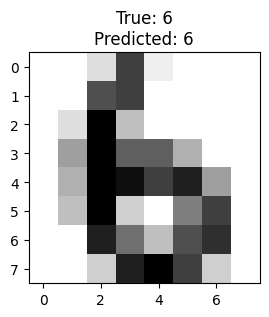

In [8]:
# display digit image
# change image_index and see each image with its label

image_index = 45
plt.figure(1, figsize=(3, 3))
plt.imshow(images_test[image_index], cmap=plt.cm.gray_r, interpolation='nearest')
plt.title(f"True: {y_test[image_index]}\nPredicted: {y_pred[image_index]}")
plt.show()

---

<!-- JPN -->
##### 課題 1

　sckit-learnを用いずにブートストラップ法によるデータセットの生成を実装してみよう。次のコードは以下の内容を実装するコードである。適切に空欄を埋めて実行可能にせよ。

1. 平均0, 標準偏差1の正規分布から1000個のデータをもつデータセット `data_normal` を作成する。

2. `data_normal` からブートストラップ法を用いて1000個のデータをもつデータセットを10回生成し、各データセットの平均と標準偏差を表示する。

なお、実行できるようになったら、平均と標準偏差が元の正規分布とほぼ同一であることを確認してほしい。


<!-- ENG -->
##### Exercise 1

　Let's try to implement the data set generation with the bootstrap resampling without using sckit-learn. The following is the code that implements the content below. Fill out blanks as appropriate to make it executable.

1. Create the data set `data_normal` with 1,000 data from a normal distribution with a mean of 0 and a standard deviation of 1.

2. Generate 10 data sets with 1,000 data from `data_normal` using the bootstrap resampling and show the mean and standard deviation of each data set.

When you are ready to execute, please make sure that the mean and standard deviation are almost identical to the original normal distribution.


In [9]:
# CODE CELL FOR YOUR ANSWER

np.random.seed(0)
data_normal = np.random.normal(loc=0, scale=1, size=1000)

num_iter = 10
for i in range(num_iter):
  data_sampled = np.random.choice(data_normal, size=len(data_normal), replace=True)
  print(np.mean(data_sampled), np.std(data_sampled))


-0.022323210219890116 0.9705461270049136
0.029801559080417834 0.9872652294814247
-0.044478686704528834 0.9480941469371581
-0.08405613793375483 0.9963416524661426
-0.06577735822941069 0.9736395953939555
-0.02288367635432146 0.9978266437440746
-0.055425189983354245 0.9758203386432039
-0.01775319278727037 0.9788109949078446
-0.054440051789176776 0.9651647982176819
-0.046878176155955305 0.9758619156682578


---

<!-- JPN -->

##### 課題 2（実践、提出不要）

　scikit-learnの`BaggingClassifier`を使わずに、多数決によるバギングを実装してみよう。

　digits データセットについて、学習するデータ数を1000としたとき、

1.   ブートストラップ法を用いて100個のデータセットを作成し、
2.   それぞれのデータセットに基づいて100個の決定木を`DecisionTreeClassifier`を用いて作成し、
3.   その結果の多数決をとる

ことによりバギングを実装せよ。また、その結果が`BaggingClassifier`を用いて実装したバギングの予測精度と概ね一致することを確認せよ。




<!-- ENG -->

##### Exercise 2 (Practical, not required to submit)

　Let's try to implement bagging by majority vote without using scikit-learn's `BaggingClassifier`.

　For the digits data set, if the number of data to be trained is 1,000, implement bagging by executing following steps.

1.   Generate a 100 item data set using the bootstrap resampling
2.   Train 100 decision trees based on each data set, using the `DecisionTreeClassifier`
3.   Take a majority vote of the results

Also, confirm that the results are generally consistent with the prediction accuracy of the bagging implemented using `BaggingClassifier`.



---

<!-- JPN -->
### 2.2 | ランダムフォレスト (random forest)

<!-- ENG -->
### 2.2 | Random forest

<!-- JPN -->
　**ランダムフォレスト**はバギングを改良した手法であり、ブートストラップ法を用いて多数のデータセットを生成し、各データセットから決定木を生成する。それに加えて、ランダムフォレストでは**各決定木の分岐で使用する説明変数（特徴量）をランダムに一部だけ選んで使用**する。

<!-- ENG -->
　**Random forest** is an improved version of bagging, which uses the bootstrap resampling to generate a large number of data sets, and trains a decision tree from each data set. In addition to that, random forest **randomly selects only some of the explanatory variables (features) to be used in each decision tree branch**.

<!-- JPN -->
　アンサンブル学習では各学習器の性質が多様であるほど集約の効果が高まるという性質がある。特徴量をランダムに選ぶことにより単独の学習器の性能が少し落ちる一方、学習器の多様性が高まるため、ランダムフォレストはバギングよりも性能が高いとされている。

　では、バギングと同様にランダムフォレストを学習させてみよう。

<!-- ENG -->
　In ensemble learning, the more diverse the properties of each learner are, the more effective the aggregation becomes. Although randomly selecting features slightly reduces the performance of a single learner, it increases the diversity of the learner. This is why random forest is considered to have better performance than bagging.

　Now let's try to train random forest the same way we did with bagging.

In [47]:
rf = ensemble.RandomForestClassifier(max_depth=10, n_estimators=10, random_state=0)
rf.fit(X_train,y_train) # fitting

y_pred = rf.predict(X_test)

print(metrics.accuracy_score(y_pred, y_test)) # test accuracy


0.9071518193224593


<!-- JPN -->
　また、ランダムフォレストでは、各変数がどの程度予測に寄与しているかの情報（特徴量の重要度、feature importance）を計算することができる。各決定木でそれぞれの分割を行う際、分割に使用した変数の寄与は分割に用いる指標の改善量で与えられる。これをすべての分割で合計することで各変数の寄与の割合が得られる。

　実際に上のランダムフォレストにおける各変数の重要度を見てみよう。

<!-- ENG -->
　Random forest also allows us to calculate information on how much each variable contributes to the prediction (feature importance). When performing each split in each decision tree, the contribution of the variables used for the split is given by the amount of improvement in the index used for the split. By totaling this up for the all the splits, the percentage of contribution of each variable can be obtained.

　Let's actually look at the importance of each variable in random forest above.

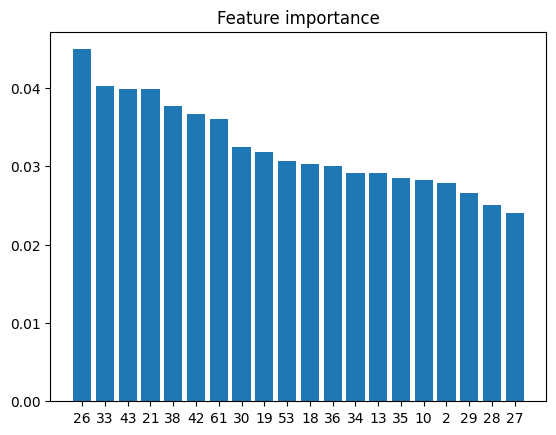

In [11]:
importances = rf.feature_importances_

# show importances as barplot
indices = np.argsort(importances)[::-1]
D = 20 # number of importances to show
plt.bar(range(D), importances[indices[:D]])
plt.xticks(range(D), indices[:D])
plt.title("Feature importance")
plt.show()

<!-- JPN -->
　重要な変数のIDが羅列されたが、これだけではイマイチ画像のどのあたりが重要かわからない。画像で表現してみよう。

<!-- ENG -->
　The important variable IDs were listed, but this is not enough to tell which part of the image is important. Let's try to represent it with images.

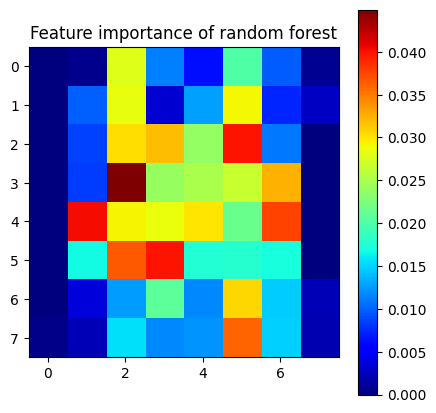

In [12]:
# show importances on image

importances_reshape = np.reshape(importances, images[0].shape)
fig, ax = plt.subplots(1, figsize=(5, 5))

im = plt.imshow(importances_reshape,
                interpolation='nearest', cmap=plt.cm.jet)
fig.colorbar(im)
plt.title("Feature importance of random forest")
plt.show()

<!-- JPN -->
　実際に文字が書かれている部分の重要度が高く、特に重要度が高いのは中央部であることがわかる。

　なお、ある特徴量の重要度が高いことは、その特徴量で木を分割した際にデータがきれいに分割できることを表しているだけで、その特徴量の値（画像であれば画素の値）が大きければ（小さければ）この文字は〇〇（数字 "3" とか）だと分類できる、というわけではないことに留意する必要がある。

<!-- ENG -->
　It can be seen that the importance is high in the area where the text is actually written, and that the importance is particularly high in the center.

　Note that a high importance of a particular feature only means that the data can be divided neatly when the tree is divided by that feature, and does not mean that if the value of that feature (pixel value in the case of an image) is large (or small), the character can be classified as XX (like the number "3").

---

<!-- JPN -->
##### 課題 3

　`ensemble.RandomForestClassifier()`に与えている変数`n_estimators`は多数決に使用する決定木の数を表すパラメータである。

　digits データセットにおいて、`n_estimators`の値を20, 40, 80, ...と増やしていったときに、テストデータの予測正解率はどのように変化していくだろうか。簡単に述べよ。


<!-- ENG -->

1.   リスト項目
2.   リスト項目


##### Exercise 3

　The variable `n_estimators` given to `ensemble.RandomForestClassifier()` is a parameter that represents the number of decision trees to be used for majority voting.

　How will the predicted accuracy of the test data change when the value of `n_estimators` is increased to 20, 40, 80, ... in the digits data set? Describe it briefly.



<!-- JPN -->
<font color=orange> **このテキストセルに答案を記述せよ。** </font>

<!-- ENG -->
<font color=orange> **Write your answer in this text cell.** </font>

As `n_estimators` increases in the digits dataset, the predicted accuracy on the test data is to improve initially (until `n_estimators` = 100, the predicted accuracy is 0.9335006273525721), benefiting from ensemble diversity. However, the improvement eventually plateau (from `n_estimators` = 140, the predicted accuracy is 0.9335006273525721), and further increases provide diminishing returns.

<!-- BOTH -->
---

<!-- JPN -->
### 2.3 | ブースティング (boosting)

<!-- ENG -->
### 2.3 | Boosting

<!-- JPN -->
　**ブースティング**はバギングやランダムフォレストと異なり、それぞれの決定木を同時に学習するのではなく、データの重みを変えながら順番に訓練していく手法である。今回の演習ではブースティングの代表的な手法である**Adaboost**を用いる。

　Adaboostでは、データの重みは過去に誤って予測したデータの重みが大きくなるようにし、最終的な予測はそれぞれの決定木の重み付き平均で行う。それぞれの決定木の重みは、その木を用いた際の訓練データへの予測精度が高いほど大きくなる。

　実際にAdaboostの学習を行ってみよう。

<!-- ENG -->
　**Boosting** differs from bagging and random forest. It does not train each decision tree individually, but trains them in sequence while changing the weights of the data. In this exercise, we will use **AdaBoost**, which is a representative boosting method.

　In AdaBoost, set the weights of the data that has been incorrectly predicted in the past to be greater, and the final prediction is made by the weighted average of each decision tree. The weight of each decision tree increases as the prediction accuracy of the training data when using that tree is higher.

　Let's actually try training AdaBoost.

In [22]:
single_tree = tree.DecisionTreeClassifier(max_depth=10, random_state=0)
ada_dt = ensemble.AdaBoostClassifier(estimator=single_tree, n_estimators=10, random_state=0)
ada_dt.fit(X_train,y_train) # fitting

y_pred = ada_dt.predict(X_test)

print(metrics.accuracy_score(y_pred, y_test)) # test accuracy


0.9209535759096612


---

<!-- JPN -->
##### 課題 4
　バギング、ランダムフォレスト、AdaBoostそれぞれについて、木の数を10とした場合のテストデータの予測精度を比較し、最も性能の高い機械学習手法を選択せよ。

　また、木の数を1000とした場合についても同様に最も性能の高い機械学習手法を選択せよ。



<!-- ENG -->

##### Exercise 4
　Compare the prediction accuracy of the test data for bagging, random forest, and AdaBoost when the number of trees is 10, and answer the best method.

　Also, answer the best method for the case where the number of trees is 1,000.



<!-- JPN -->
<font color=orange> **このテキストセルに答案を記述せよ。** </font>

<!-- ENG -->
<font color=orange> **Write your answer in this text cell.** </font>

When the number of trees is 10, compare to bagging and random forest, AdaBoost have the best accuracies.

As the number increases to 1,000, random forest perform the best due to its robustness and diversity.

---

<!-- JPN -->
##### 課題 5（発展）

　上記の例では、`ensemble.AdaBoostClassifier(estimator=single_tree, ...)`と、最大深さが10の決定木を使うことを明示的に指定したが、`estimator`を与えなかった場合はどのような学習器を用いてAdaboostを行うだろうか。
scikit-learnの[API Reference](https://scikit-learn.org/stable/modules/classes.html)を参照することで答えよ。



<!-- ENG -->
##### Exercise 5 (Advanced)

　In the above example, we have explicitly specified that we want to use a decision tree with a maximum depth of 10 as seen in `ensemble.AdaBoostClassifier(estimator=single_tree, ...)`, if we do not give a `estimator`, what kind of learner would be used to execute AdaBoost?
Answer by referring to the [API Reference](https://scikit-learn.org/stable/modules/classes.html) for scikit-learn.



<!-- JPN -->
<font color=orange> **このテキストセルに答案を記述せよ。** </font>

<!-- ENG -->
<font color=orange> **Write your answer in this text cell.** </font>

A decision tree classifier (tree.DecisionTreeClassifier(max_depth=1)) will be used to execute AdaBoost.

Because a decision tree classifier is a tree with a single node and two leaves, making it a shallow and simple learner suitable for boosting. And AdaBoost focuses on training weak learners, and a decision tree classifier is a simple and weak model that performs slightly better than random guessing without leading to overfitting.


---

<!-- JPN -->
## 3 | 予測された確率値による予測結果の解析

<!-- ENG -->
## 3 | Analysis of prediction results using predicted probability values

<!-- JPN -->
　本日学んだアンサンブル学習は多数決を行っている（バギング、ランダムフォレストは単純多数決、ブースティングは重み付き多数決）ので、**アンサンブル学習では確率値を出力することができる**。ここでは、`n_estimators=1000` のバギングを使い、「予測しやすいケース」「予測が難しいケース」を目視していくことにしよう。

　確率値の出力は、 `predict()` の代わりに `predict_proba()` を使えばよいのであった。

<!-- ENG -->
　Since the ensemble learning we learned this time uses majority voting (bagging and random forests use simple majority voting, while boosting uses weighted majority voting), **the ensemble learning can output probability values**. Here, we will use `n_estimators=1000` bagging to visually identify the "easy to predict case" and "hard to predict case".

　For outputting probability values, we can use `predict_proba()` instead of `predict()`.

In [48]:
from sklearn import tree, ensemble
single_tree = tree.DecisionTreeClassifier(max_depth=10, random_state=0)

bagging_dt = ensemble.BaggingClassifier(estimator=single_tree, n_estimators=1000, random_state=0)
bagging_dt.fit(X_train,y_train) # fitting

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=10,
                                                   random_state=0),
                  n_estimators=1000, random_state=0)

In [49]:
y_pred_proba = bagging_dt.predict_proba(X_test)
print(y_pred_proba)
print(y_pred_proba.shape)

[[0.         0.78093056 0.015      ... 0.004      0.0280438  0.05099615]
 [0.009      0.04263998 0.003      ... 0.10716667 0.02996505 0.004     ]
 [1.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.00227381 0.38458638 0.03112332 ... 0.00230103 0.51408231 0.00397928]
 [0.         0.00303675 0.         ... 0.01202655 0.01302326 0.96266369]
 [0.006      0.0430443  0.07716    ... 0.         0.68984578 0.03141914]]
(797, 10)


<!-- JPN -->
それぞれの画像に対して、10種類の確率値が予測されていることがわかる（決定木自体も訓練データを完全分離できなかった場合は確率的に予測を行うため、$k/1000$ で表現できない確率値になっていることに注意）。

　続いて、「予測しやすいケース」として、単一の文字に対する確率値が `1.0` と予測されたデータを確認してみることにする。

<!-- ENG -->
For each image, we can see that 10 different probability values are predicted (note that the decision tree itself also makes probabilistic predictions when the training data cannot be completely separated, so be aware that the probability values are the ones which cannot be expressed in $k/1000$).

　Next, as an "easy to predict case", let's check the data in which the predicted probability value for a single character is `1.0`.

In [50]:
import numpy as np
easy_case = np.max(y_pred_proba, axis=1)==1 # Extract the prediction results with a maximum value of 1.0
images_test_easy = images_test[easy_case]
y_pred_proba_easy = y_pred_proba[easy_case]
y_test_easy = y_test[easy_case]
print(len(y_test_easy)) # Check the number of easy cases
print(y_test_easy)

22
[0 6 0 0 0 0 0 0 0 0 0 0 0 0 6 0 0 0 0 0 0 0]


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
predicted as 0


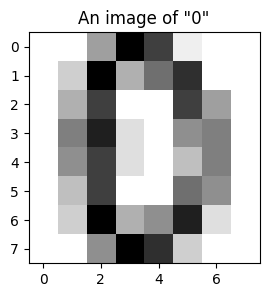

In [51]:
image_index = 0
print(y_pred_proba_easy[image_index])
print("predicted as", y_pred_proba_easy[image_index].argmax())
plt.figure(1, figsize=(3, 3))
plt.imshow(images_test_easy[image_index], cmap=plt.cm.gray_r, interpolation='nearest')
plt.title(f"An image of \"{y_test_easy[image_index]}\"")
plt.show()

<!-- JPN -->
　この結果を見ると、"0"および"6"が予測しやすいようである（ `image_index` を変えながら目視することで、確かに人間が見てもわかりやすい文字であることを確認せよ）。

　続いて、「予測が難しいケース」として、どの数字に対する確率値も `0.5` 未満であると予測されケースを探してみよう。

<!-- ENG -->
　Looking at the results, "0" and "6" seem to be fairly  predictable (confirm that the characters are indeed human-readable by visually inspecting them while changing the `image_index`).

　Next, let's look for the "hard to predict case", where every predicted probability value is less than `0.5`.

In [52]:
hard_case = np.max(y_pred_proba, axis=1)<0.5 # Extract cases where all probability values are less than 0.5
images_test_hard = images_test[hard_case]
y_pred_proba_hard = y_pred_proba[hard_case]
y_test_hard = y_test[hard_case]
print(len(y_test_hard)) # Check the number of hard cases
print(y_test_hard)

132
[4 9 9 9 9 4 7 8 7 4 9 8 1 7 3 9 1 8 9 8 8 9 8 8 3 5 8 1 7 4 8 1 8 1 1 7 8
 8 8 8 1 2 2 4 8 0 8 2 2 2 7 4 2 9 8 4 1 5 6 1 4 9 8 8 9 1 5 7 1 8 1 9 1 6
 7 8 1 2 2 6 8 0 9 8 9 1 3 1 0 7 2 3 3 3 4 1 1 4 6 3 7 8 1 6 1 2 5 9 5 4 8
 9 3 4 3 3 5 5 3 2 3 3 3 5 2 2 3 1 3 8 5 8]


[0.001      0.35828184 0.02471411 0.0164     0.28154683 0.11493082
 0.00322578 0.0455     0.07195618 0.08244444]
predicted as 1


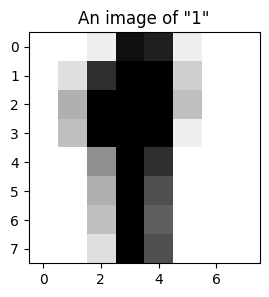

In [53]:
image_index = 76
print(y_pred_proba_hard[image_index])
print("predicted as", y_pred_proba_hard[image_index].argmax())
plt.figure(1, figsize=(3, 3))
plt.imshow(images_test_hard[image_index], cmap=plt.cm.gray_r, interpolation='nearest')
plt.title(f"An image of \"{y_test_hard[image_index]}\"")
plt.show()

<!-- JPN -->
　明らかに（人間が見ても）予測が困難であるケース（例えば `image_index = 1` ）が散見される一方で、人間が見ればわかるようなケース（例えば `image_index = 76` ）も存在している。このようなケースを複数注視することで、例えば特徴量エンジニアリングと呼ばれる、「画像の右下部分が"2"と"7"を分けるのに重要であるから追加で特徴量を作成しよう」などといった、**学習器への入力特徴量の改善の考案が可能**になる。予測結果と元のデータとの関係は常に確認し、"データを愛でる" つもりで見るのが良いだろう。

<!-- ENG -->
　While there are a few cases that are clearly difficult to predict (even by human eyes) (e.g., `image_index = 1`), there are also cases that are obvious to humans (e.g., `image_index = 76`). By focusing on similar such cases, **it is possible to devise ideas for improving input features to the learner**, for example, "since the lower right part of the image is important for separating "2" and "7", you can create additional features”, which is called feature engineering.
It is always a good idea to check the relationship between the prediction results and the original data, and to "love the data".

<!-- BOTH -->
-----

<!-- JPN -->
##### 課題6（実践、提出不要）

[Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)を使った画像分類を行う。

**課題6-1**
scikit-learnの`RandomForestClassifier`を用いて分類モデルを構築し、訓練データによる訓練、およびテストデータによる予測を行い、構築された予測モデルのテストデータに対するaccuracyを算出せよ。

**課題6-2**
課題6-1で予測困難だったデータを取り上げ、そのデータの予測が難しい理由を考察せよ。

<!-- ENG -->
##### Exercise 6 (Practical, not required to submit)

Perform image classification using [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist).

**Exercise 6-1**
Construct a classification model using `RandomForestClassifier` in scikit-learn, train and predict the model using train data and test data respectively, and calculate the accuracy for test data.

**Exercise 6-2**
Find the data that was difficult to predict in exercise 5-1, and discuss why the data was.

In [54]:
# loading data
import io
import gzip
import requests
import numpy as np
urls = {
    "train_image": "http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz",
    "train_label": "http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz",
    "test_image": "http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz",
    "test_label": "http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz"
}
def load_labels(url):
    data = None
    response = requests.get(url)
    gzip_stream = io.BytesIO(response.content)
    with gzip.open(gzip_stream, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data

def load_images(url):
    data = None
    response = requests.get(url)
    gzip_stream = io.BytesIO(response.content)
    with gzip.open(gzip_stream, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    return data

def load_data():
    print("loading image data ...")
    X_train = load_images(urls["train_image"])
    X_test = load_images(urls["test_image"])
    print("loading label data ...")
    y_train = load_labels(urls["train_label"])
    y_test = load_labels(urls["test_label"])
    return X_train.astype(np.float32).reshape(-1, 28*28), y_train, X_test.astype(np.float32).reshape(-1, 28*28), y_test

In [55]:
X_train, y_train, X_test, y_test = load_data()
label_list = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

loading image data ...
loading label data ...


9


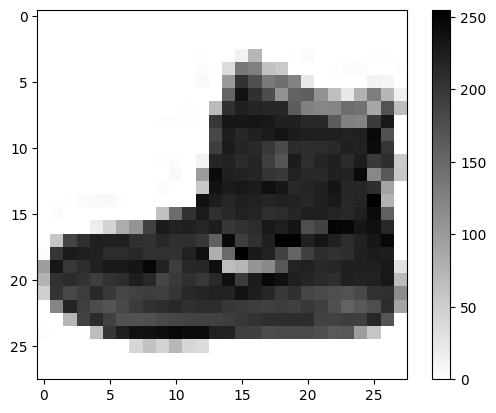

In [56]:
# display image
import matplotlib.pyplot as plt

plt.imshow(X_train[0, :].reshape(28, 28), cmap="binary")
plt.colorbar()
print(y_train[0])

True label: 8 - Bag
Predicted label: 9 - Ankle boot


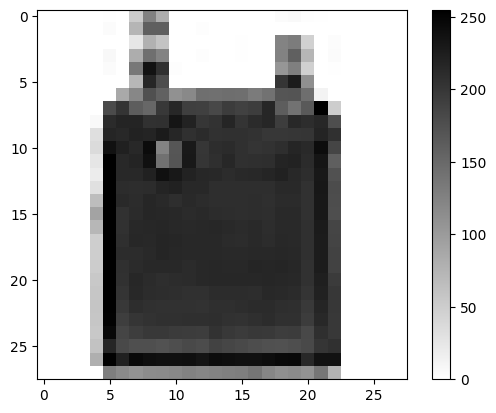

In [57]:
import matplotlib.pyplot as plt

id_image = 529

print("True label:", y_test[id_image], "-", label_list[y_test[id_image]])
print("Predicted label:", y_pred[id_image], "-", label_list[y_pred[id_image]])

plt.imshow(X_test[id_image, :].reshape(28, 28), cmap="binary")
plt.colorbar()
plt.show()